In [53]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Market Analysis

## Deliveroo

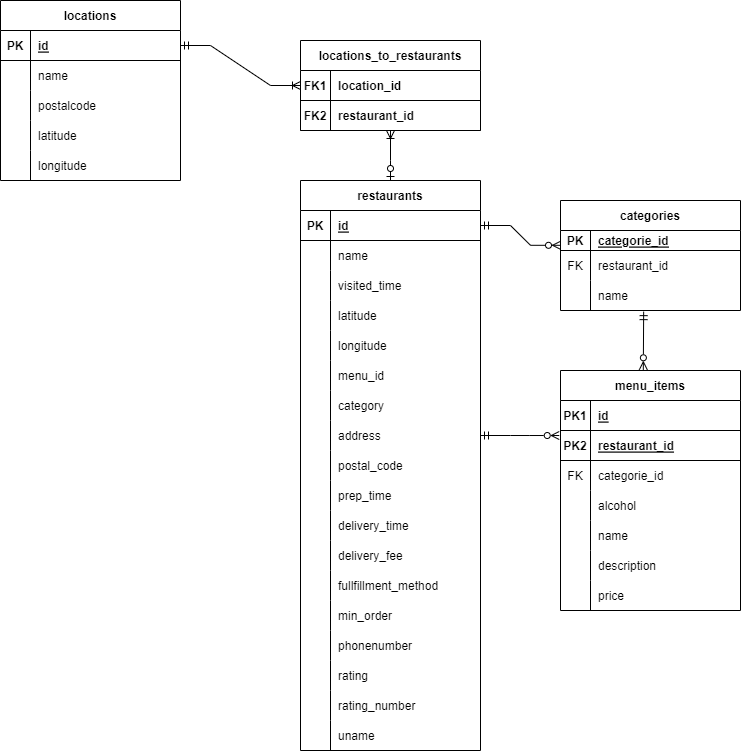

In [60]:
conn_deliveroo = sqlite3.connect("./Databases/deliveroo.db")

### Map locations offering kapsalons and their average price.

In [64]:
query = """
    SELECT restaurants.name as name, ROUND(AVG(menu_items.price), 2) as avg_price, 
    restaurants.latitude as latitude, restaurants.longitude as longitude
    FROM menu_items
    JOIN restaurants ON restaurants.id = menu_items.restaurant_id
    WHERE menu_items.name LIKE "%kapsalon%"
    GROUP BY restaurants.name;
"""

data_deliveroo = pd.read_sql(query, conn_deliveroo)

In [66]:
geo_data_deliveroo = gpd.GeoDataFrame(data_deliveroo, geometry=gpd.points_from_xy(data_deliveroo.longitude, data_deliveroo.latitude), crs="EPSG:4326")

In [67]:
geo_data_deliveroo.explore()

## TakeAway

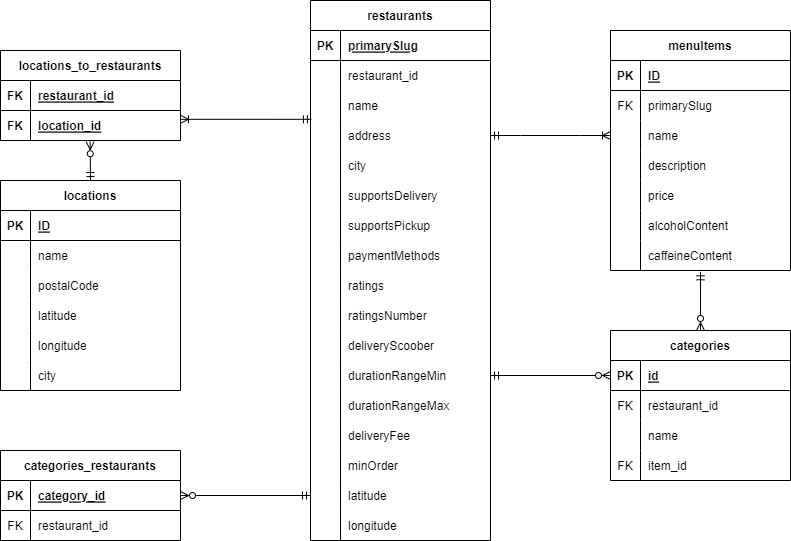

In [70]:
conn_takeaway = sqlite3.connect("./Databases/takeaway.db")

### Map locations offering kapsalons and their average price.

In [77]:
query = """
    SELECT restaurants.primarySlug as name, ROUND(AVG(menuItems.price), 2) as avg_price, 
    restaurants.latitude as latitude, restaurants.longitude as longitude
    FROM menuItems
    JOIN restaurants ON restaurants.primarySlug = menuItems.primarySlug
    WHERE menuItems.name LIKE "%kapsalon%"
    GROUP BY restaurants.primarySlug;
"""

data_takeaway = pd.read_sql(query, conn_takeaway)

In [78]:
geo_data_takeaway = gpd.GeoDataFrame(data_takeaway, geometry=gpd.points_from_xy(data_takeaway.longitude, data_takeaway.latitude), crs="EPSG:4326")

In [79]:
geo_data_takeaway.explore()

## UberEats

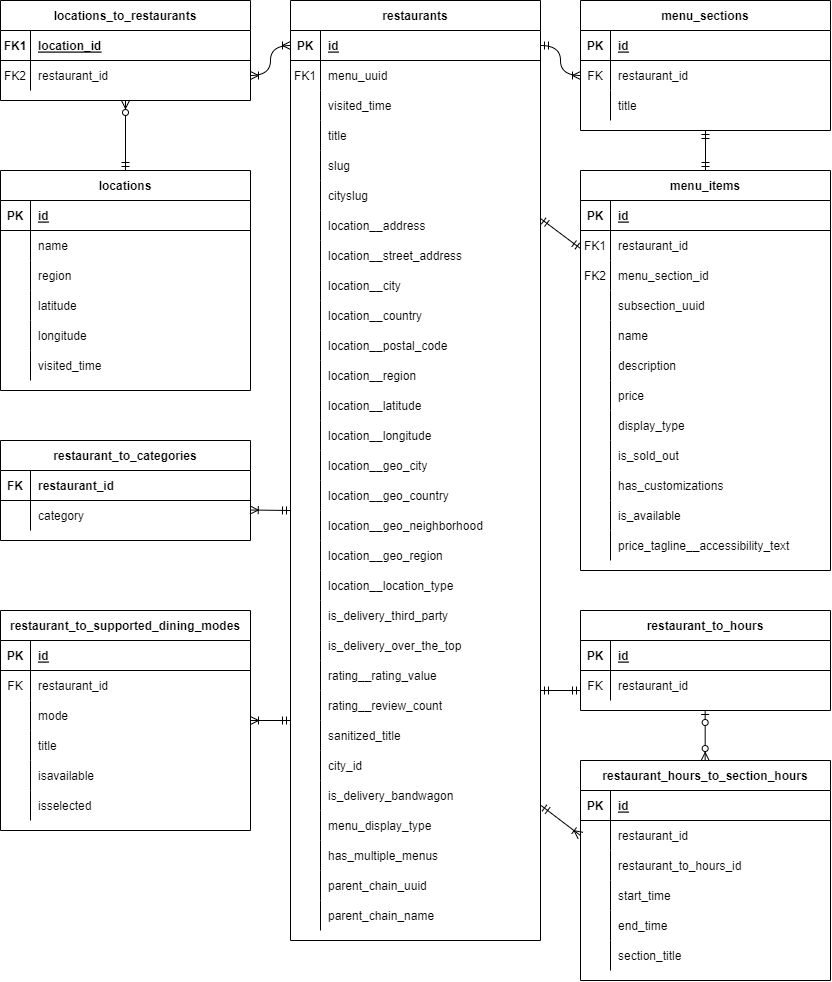

In [81]:
conn_ubereats = sqlite3.connect("./Databases/ubereats.db")

### Map locations offering kapsalons and their average price.

In [86]:
query = """
    SELECT restaurants.sanitized_title as name, ROUND(AVG(menu_items.price / 100), 2) as avg_price, 
    restaurants.location__latitude as latitude, restaurants.location__longitude as longitude
    FROM menu_items
    JOIN restaurants ON restaurants.id = menu_items.restaurant_id
    WHERE menu_items.name LIKE "%kapsalon%"
    GROUP BY restaurants.sanitized_title;
"""

data_ubereats = pd.read_sql(query, conn_ubereats)

In [87]:
geo_data_ubereats = gpd.GeoDataFrame(data_ubereats, geometry=gpd.points_from_xy(data_ubereats.longitude, data_ubereats.latitude), crs="EPSG:4326")

In [88]:
geo_data_ubereats.explore()

## Where are the delivery ‘dead zones’—areas with minimal restaurant coverage?

In [95]:
query1 = """
    SELECT latitude, longitude
    FROM restaurants;
"""
query2 = """
    SELECT latitude, longitude
    FROM restaurants;
"""
query3 = """
    SELECT location__latitude as latitude, location__longitude as longitude
    FROM restaurants;
"""

data_deliveroo = pd.read_sql(query1, conn_deliveroo)
data_takeaway = pd.read_sql(query2, conn_takeaway)
data_ubereats = pd.read_sql(query3, conn_ubereats)

In [97]:
data = pd.concat([data_deliveroo, data_takeaway, data_ubereats], axis=0, ignore_index=True)

In [98]:
geo_data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude), crs="EPSG:4326")

In [99]:
geo_data.explore()